In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from IPython.utils import io
from PyEyeSim import EyeData

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
Path='C:/Users/Utente/Documents/University/Courses/P1&P2/EyeMovementDat/'
FilePath=Path+'merged_manipulated.csv'
FixData=pd.read_csv(FilePath, sep=',',header=0, dtype={'subject': str})
print(np.shape(FixData))

(209676, 12)


In [4]:
# delete every row where the repetition is not 0 and record_number is not 0
FixData=FixData[FixData['repetition']==0]
FixData=FixData[FixData['record_number']==0]
print(np.shape(FixData))

(204187, 12)


dataset size:  (204187, 12)
presentation size:  x= 1920 pixels y= 1080  pixels
presentation size:  x= 1920 pixels y= 1080  pixels
Stimulus  not found !!, provide column as Stimulus =YourColumn , default:  Stimulus
subjectID  not found !!, provide column as subjectID =YourColumn , default:  subjectID
mean_x  not found !!, provide column as mean_x =YourColumn , default:  mean_x
mean_y  not found !!, provide column as mean_y =YourColumn , default:  mean_y
info found for 200 subjects, and 36 stimuli
sizecorrect =  True ; If stimulus not full screen, assume central presentation, use correction
run descriptive analysis
Data for  200 observers and  36  stimuli.


C:\Users\Utente\Documents\University\Master\PyEyeSim\PyEyeSim\__init__.py:281: UserWarning: Stim path not provided
  warnings.warn("Stim path not provided")


Mean fixation number:  29.03  +/-  8.24
fixation duration not asked for
Num of trials with zero fixations: 0
Num valid trials  7028
Mean X location:  482.3  +/-  88.7  pixels
Mean Y location:  469.4  +/-  64.7  pixels
Mean saccade  amplitude:  106.4  +/-  16.6  pixels
Mean scanpath  length:  2596.6  +/-  494.9  pixels
Data for  200 observers and  36  stimuli.
Mean fixation number:  29.03  +/-  8.24
fixation duration not asked for
Num of trials with zero fixations: 0
Num valid trials  7028
Mean X location:  482.3  +/-  88.7  pixels
Mean Y location:  469.4  +/-  64.7  pixels
Mean saccade  amplitude:  106.4  +/-  16.6  pixels
Mean scanpath  length:  2596.6  +/-  494.9  pixels


(array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
          12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
          23,   24,   25,   26,   27,   28,   29,   30, 8881, 8882, 8883,
        8884, 8885, 8886], dtype=int64),
 array(['21418', '21422', '21463', '21468', '21469', '21474', '21480',
        '21498', '21513', '21522', '21526', '21531', '21568', '21629',
        '21630', '21636', '21641', '21653', '21658', '21667', '21680',
        '21683', '21685', '21699', '21706', '21735', '21774', '21811',
        '21819', '21820', '21862', '21878', '21889', '21927', '21930',
        '21939', '21946', '22018', '22036', '22108', '22109', '22127',
        '22129', '22138', '22149', '22168', '22174', '22180', '22181',
        '22186', '22204', '22214', '22219', '22228', '22234', '22239',
        '22242', '22261', '22271', '22279', '22291', '22322', '22324',
        '22327', '22341', '22346', '22376', '22378', '22383', '22388',
        '22394', '22410', '

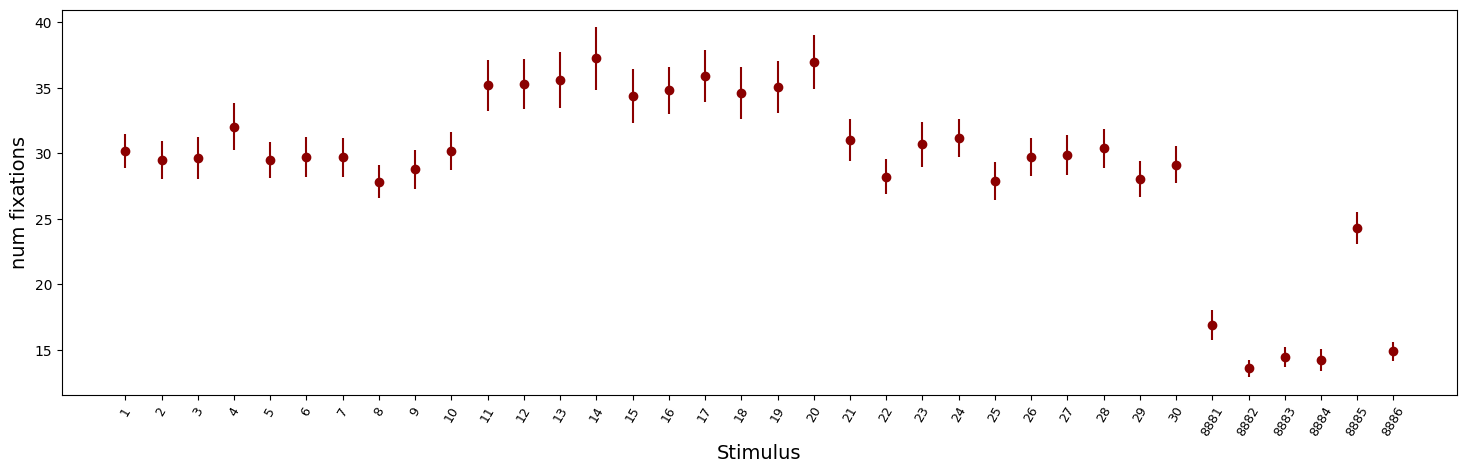

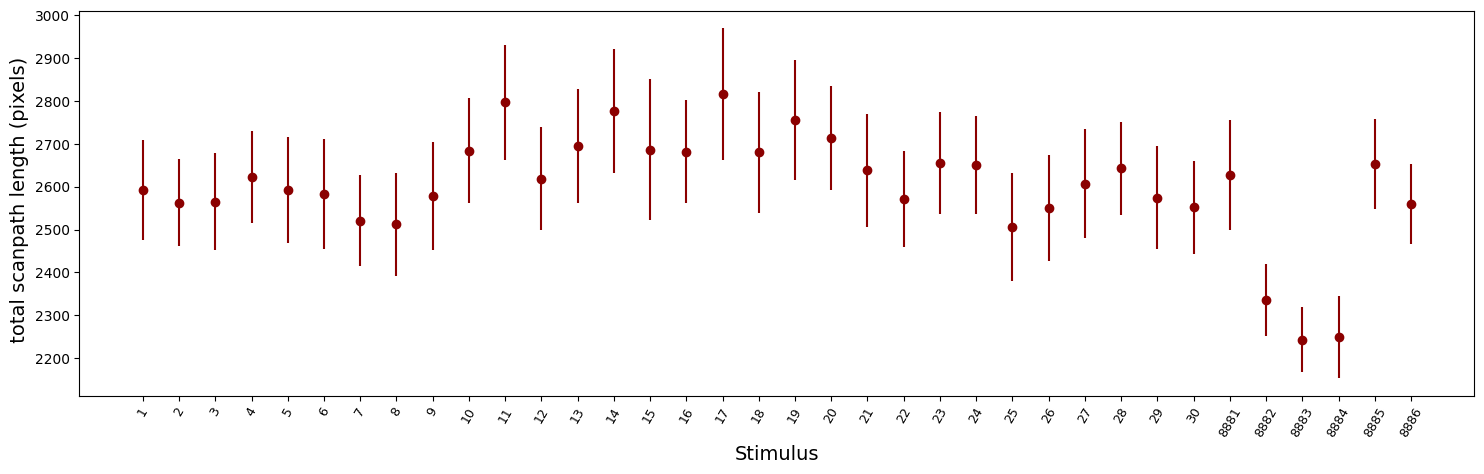

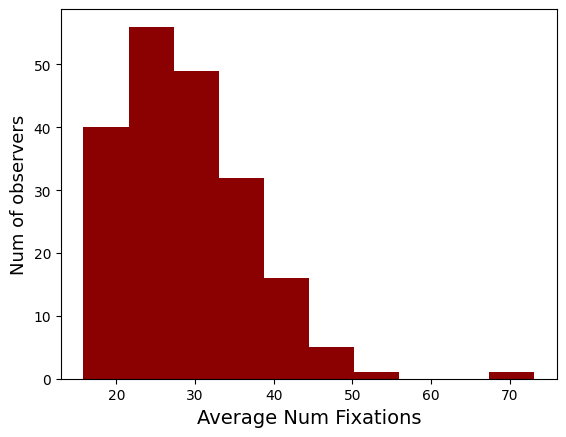

In [5]:

#sizeX,sizeY=1024, 768 
sizeX,sizeY=1920, 1080


DyslexiaDat=EyeData(FixData,sizeX,sizeY)
DyslexiaDat.DataInfo(mean_x='fix_x',mean_y='fix_y',FixDuration='duration_ms',Stimulus='stimulus',subjectID='subject')
DyslexiaDat.RunDescriptiveFix(Visual=1)

---

In [6]:
complete_data = []
missing_data = {}
subject_with_missing_data = {}
set_subj = set()
for i in range(0,36):
    FixGr=np.array(DyslexiaDat.nfix[0:117,i])
    if not np.isnan(FixGr).any():
        complete_data.append(i)
    if np.isnan(FixGr).any():
        missing_data[i] = np.isnan(FixGr).sum()
        for x in np.where(np.isnan(FixGr))[0]:
            subject_with_missing_data[x] = +1
            set_subj.add(x)


print(f'{len(complete_data)} Stimuli with complete data: {complete_data}')
print(f'{len(missing_data)} Stimuli with Missing data: {missing_data}')
print(f'Max subject that have not seen the stimulus: {max(missing_data.values())}')
print(f'{len(subject_with_missing_data)} Subjects with missing data: {subject_with_missing_data}')

10 Stimuli with complete data: [0, 3, 4, 5, 7, 15, 18, 28, 31, 32]
26 Stimuli with Missing data: {1: 1, 2: 1, 6: 1, 8: 1, 9: 1, 10: 3, 11: 3, 12: 2, 13: 3, 14: 1, 16: 2, 17: 1, 19: 2, 20: 1, 21: 1, 22: 1, 23: 1, 24: 2, 25: 1, 26: 2, 27: 1, 29: 1, 30: 1, 33: 1, 34: 2, 35: 3}
Max subject that have not seen the stimulus: 3
29 Subjects with missing data: {115: 1, 43: 1, 53: 1, 10: 1, 15: 1, 17: 1, 91: 1, 94: 1, 116: 1, 32: 1, 83: 1, 20: 1, 41: 1, 96: 1, 55: 1, 44: 1, 82: 1, 14: 1, 2: 1, 66: 1, 73: 1, 58: 1, 25: 1, 99: 1, 64: 1, 8: 1, 27: 1, 76: 1, 80: 1}


Here we check for the Munich subjects, the amount of stimuli and subject that have some empty data. In other words, we check for every subjects wich and how many stimuli they have not seen (or have been delete because with repetition > 0 and record_number > 0)

Over 36 stimuli 26 have at least one subject that have not seen them.

Over 117 subject only 20 have not seen at least one stimuli (actually every of these subjects have got a proble with one stimulus).

We can consider to remove this 20 subject from the dataset (that correspond to around 17% of the total), or consider to use only the 10 stimui that have full data for every subject, or every time that we randomly select a combination of stimulus/subject check if the subject has seen the stimulus and if not substitute it with another one.

---

In [7]:
WhichC, WhichCN = DyslexiaDat.GetGroups('Group')

Conditions [ 1.  2.  3.  4. nan]


In [8]:
WhichC = np.array(WhichC, dtype=float)
WhichC[np.isnan(WhichC)] = 4
WhichC = WhichC.astype(int)
WhichC[WhichC == 0] = 1
WhichC[WhichC == 2] = 0
WhichC[WhichC == 3] = 0
WhichC[WhichC == 4] = 0
WhichC

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0])

In [9]:
# convert WhichCN to a numpy array of type float
WhichCN = np.array(WhichCN, dtype=float)
# substitute nan values with max value + 1
WhichCN[np.isnan(WhichCN)] = 0 
WhichCN = WhichCN.astype(int)
# Trasform all 4 in 0
WhichCN[WhichCN == 4] = 0
WhichCN[WhichCN == 3] = 0
# Trasform all 1,2 in 1
WhichCN[WhichCN == 2] = 1
WhichCN

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0])

In [10]:
# create a list of subjects from 117 to 200
GrazSubs = DyslexiaDat.subjects[117:200]
GrazSubs_Idx = list(range(117,200))
MunichSubs_Idx = list(range(0,117))

## MLP

We define a multilayer perceptron (MLP) to train over specific features extracted from the data.

In [11]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler

In [12]:
list(set_subj)

[2,
 8,
 10,
 14,
 15,
 17,
 20,
 25,
 27,
 32,
 41,
 43,
 44,
 53,
 55,
 58,
 64,
 66,
 73,
 76,
 80,
 82,
 83,
 91,
 94,
 96,
 99,
 115,
 116]

In [13]:
from scipy.stats import entropy
def get_entropy(self, subj, stim):
    # get fixation (array([x]), array([y]))
    fixations = DyslexiaDat.GetFixationData(DyslexiaDat.subjects[subj], DyslexiaDat.stimuli[stim])
    # calculate entropy of the fixation distribution
    sizeX = self.x_size
    sizeY = self.y_size
    x = fixations[0].tolist()
    y = fixations[1].tolist()
    # create a 2D histogram
    H, xedges, yedges = np.histogram2d(x, y, bins=(sizeX, sizeY))
    # normalize the histogram
    H = H / H.sum()
    # calculate entropy
    ent = entropy(H.flatten())
    return ent

In [14]:
def GlobalFeature(self, Saccades, stim):
    Features = np.empty((self.ns), dtype=object)
    for s in range(self.ns):
        angles = []
        progressive_s = 0
        regressive_s = 0
        for saccade in Saccades[s][stim]:
            angles.append(saccade.Angle())
            if saccade.Angle() > 270 or saccade.Angle() < 90:
                progressive_s += 1
            elif saccade.Angle() > 90 and saccade.Angle() < 270:
                regressive_s += 1
        
        fix_durations = DyslexiaDat.GetDurations(DyslexiaDat.subjects[s], DyslexiaDat.stimuli[stim])

        Features[s] = {'number_fixation':  self.nfixations[s][stim],
                       'fixation_entropy': get_entropy(self, s, stim),
                       'mean_fixation_duration': np.mean(fix_durations),
                       'std_fixation_duration': np.std(fix_durations),
                       'total_reading_duration': np.sum(fix_durations),
                       'mean_saccade_amplitude': np.mean(angles),
                       'std_saccade_amplitude': np.std(angles),
                       'regression': regressive_s,
                       'progression/regression': regressive_s if regressive_s == 0 else progressive_s/regressive_s
                        }
    return Features

In [15]:
stimuli = list(range(0, 30))

In [16]:
GlobalFeature_array = []
Saccades = DyslexiaDat.GetSaccades()
for stim in stimuli:
    GlobalFeature_array.append(GlobalFeature(DyslexiaDat, Saccades, stim))
    print(f'Global features for stimulus {stim+1} calculated')

C:\Users\Utente\AppData\Local\Temp\ipykernel_7412\641606591.py:13: RuntimeWarning: invalid value encountered in divide
  H = H / H.sum()
c:\ProgramData\anaconda3\envs\eyesim\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\ProgramData\anaconda3\envs\eyesim\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\ProgramData\anaconda3\envs\eyesim\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\ProgramData\anaconda3\envs\eyesim\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\ProgramData\anaconda3\envs\eyesim\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in

Global features for stimulus 1 calculated
Global features for stimulus 2 calculated
Global features for stimulus 3 calculated
Global features for stimulus 4 calculated
Global features for stimulus 5 calculated
Global features for stimulus 6 calculated
Global features for stimulus 7 calculated
Global features for stimulus 8 calculated
Global features for stimulus 9 calculated
Global features for stimulus 10 calculated
Global features for stimulus 11 calculated
Global features for stimulus 12 calculated
Global features for stimulus 13 calculated
Global features for stimulus 14 calculated
Global features for stimulus 15 calculated
Global features for stimulus 16 calculated
Global features for stimulus 17 calculated
Global features for stimulus 18 calculated
Global features for stimulus 19 calculated
Global features for stimulus 20 calculated
Global features for stimulus 21 calculated
Global features for stimulus 22 calculated
Global features for stimulus 23 calculated
Global features for 

In [17]:
SaccadeObj = DyslexiaDat.GetSaccades()

In [18]:
Saccade = DyslexiaDat.SaccadeSel(SaccadeObj, nHor=1, nVer=1)

In [19]:
Saccade.shape

(200, 36, 1, 1)

In [20]:
SimMatrix = DyslexiaDat.SacSim1Group(Saccade, method='cosine', Thr=5)

In [21]:
SimMatrix.shape

(200, 200, 36, 1, 1)

In [22]:
from PyEyeSim.scanpathsimhelper import CreatAoiRects

AOIRects = CreatAoiRects(1, 1, DyslexiaDat.x_size, DyslexiaDat.y_size, allsame=DyslexiaDat.np)

In [23]:
Features = np.empty((DyslexiaDat.ns, len(stimuli),  1, 1), dtype=object)
for stim in stimuli:
    Features[:,stim,:,:] = DyslexiaDat.FeatureExtraction(SaccadeObj, Saccade[:,stim,:,:], nHor=1, stim=stim, nVer=1, AOIRects=AOIRects)
    print(f'Features for stimulus {stim+1} calculated')

C:\Users\Utente\Documents\University\Master\PyEyeSim\PyEyeSim\_scanpathsim.py:727: RuntimeWarning: Mean of empty slice
  'mean_fixation_duration': np.nanmean(duration),


Features for stimulus 1 calculated
Features for stimulus 2 calculated
Features for stimulus 3 calculated
Features for stimulus 4 calculated
Features for stimulus 5 calculated
Features for stimulus 6 calculated
Features for stimulus 7 calculated
Features for stimulus 8 calculated
Features for stimulus 9 calculated
Features for stimulus 10 calculated
Features for stimulus 11 calculated
Features for stimulus 12 calculated
Features for stimulus 13 calculated
Features for stimulus 14 calculated
Features for stimulus 15 calculated
Features for stimulus 16 calculated
Features for stimulus 17 calculated
Features for stimulus 18 calculated
Features for stimulus 19 calculated
Features for stimulus 20 calculated
Features for stimulus 21 calculated
Features for stimulus 22 calculated
Features for stimulus 23 calculated
Features for stimulus 24 calculated
Features for stimulus 25 calculated
Features for stimulus 26 calculated
Features for stimulus 27 calculated
Features for stimulus 28 calculated
F

In [24]:
Features.shape

(200, 30, 1, 1)

In [25]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
#  Calculate training and test data for different folds
train_subjects = []
test_subjects = []
training_Vals = []
labels_train = []
test_Vals = []
labels_test = []

subj = list(set(MunichSubs_Idx) - set_subj)

labels = np.array([WhichCN[sub] for sub in subj])

for i in range(100):
    train_subj, test_subj = train_test_split(
        subj, 
        test_size=0.1, 
        random_state=i,
        stratify=labels
    )

    train_subjects.append(train_subj)
    test_subjects.append(test_subj)

    remove_subj = np.append(test_subj, np.array(GrazSubs_Idx))

    # Train set
    temp = []
    for stim in stimuli:
        with io.capture_output() as _:
            SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(stim, WhichCN, subjects=list(train_subj), nHor=1, nVer=1, inferS=False, method='cosine', Thr=5, nosubj=list(remove_subj), SaccadeObj=SaccadeObj, Saccades=Saccade[:,stim,:,:], Features=Features[:,stim,:,:], SimMatrix=SimMatrix[:,:, stim, :,:])
        temp.append(SimAndFeatureVals)
    
    training_Vals.append(temp)
    labels_train.append(np.array([WhichCN[sub] for sub in train_subj]))


    # Test set
    temp = []
    for stim in stimuli:
        with io.capture_output() as _:
            SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(stim, WhichCN, subjects=list(test_subj), nHor=1, nVer=1, inferS=False, method='cosine', Thr=5, nosubj=list(remove_subj), SaccadeObj=SaccadeObj, Saccades=Saccade[:,stim,:,:], Features=Features[:,stim,:,:], SimMatrix=SimMatrix[:,:, stim, :,:]) 
        temp.append(SimAndFeatureVals)
    
    test_Vals.append(temp)
    labels_test.append(np.array([WhichCN[sub] for sub in test_subj]))

In [26]:
print(len(training_Vals)) # 5 folds
print(len(training_Vals[0])) # 30 stimuli
print(len(training_Vals[0][0])) # 79 train subjects so 79 values for each group
print(len(test_Vals[0][0])) # 9 test subjects

100
30
79
9


In [27]:
training_Vals[0][5][9][0][0][4] # mean saccade similarity group 0 subject with index 10 in the training list for stimulus 5 of the first fold

0.2690381693060773

---

In [28]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from captum.attr import IntegratedGradients

def explain_prediction(model, input_tensor, target_class=None):
    model.eval()
    
    # Ensure input has batch dimension
    if len(input_tensor.shape) == 1:
        input_tensor = input_tensor.unsqueeze(0)
    
    # Ensure input requires grad
    input_tensor = input_tensor.requires_grad_(True)
    
    ig = IntegratedGradients(model)
    
    # If target_class is None, use the predicted class
    if target_class is None:
        with torch.no_grad():
            pred = model(input_tensor)
            target_class = pred.argmax(dim=1)
    else:
        # Ensure target_class is proper tensor format
        if isinstance(target_class, (int, np.integer)):
            target_class = torch.tensor([target_class])
        elif isinstance(target_class, np.ndarray):
            target_class = torch.from_numpy(target_class)
    
    # Get attributions
    attributions, approximation_error = ig.attribute(
        input_tensor, 
        target=target_class, 
        return_convergence_delta=True
    )
    return attributions, approximation_error

def visualize_attribution_boxplot(attribution_matrix, feature_names):
    """
    Create a box plot showing the distribution of attributions across stimuli
    
    Args:
        attribution_matrix: Shape (n_features, n_stimuli) - attributions for each feature across stimuli
        feature_names: List of feature names
    """
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Create box plot
    box_data = [attribution_matrix[i, :] for i in range(len(feature_names))]
    bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True, 
                    showmeans=True, meanline=True)
    
    # Color boxes based on mean attribution (red for negative, blue for positive)
    means = [np.mean(data) for data in box_data]
    for patch, mean_val in zip(bp['boxes'], means):
        if mean_val < 0:
            patch.set_facecolor('lightcoral')
        else:
            patch.set_facecolor('lightblue')
    
    # Customize the plot
    ax.set_ylabel("Attribution Score")
    ax.set_title("Feature Attribution Distribution Across Stimuli\n(Box=IQR, Whiskers=1.5×IQR, Orange=Mean, Green-Dotted=Median, White-Circle=Outliers)")
    ax.axhline(y=0, color='black', linestyle='-', alpha=0.3)  # Add zero line
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\nFeature Attribution Summary:")
    print("-" * 60)
    for i, name in enumerate(feature_names):
        data = attribution_matrix[i, :]
        print(f"{name:30s}: Mean={np.mean(data):7.4f}, Std={np.std(data):7.4f}, "
              f"Min={np.min(data):7.4f}, Max={np.max(data):7.4f}")

def visualize_attribution_comparison(attribution_matrix, feature_names):
    """
    Create both bar plot (means) and box plot side by side
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    
    # Left plot: Traditional bar plot with error bars
    means = np.mean(attribution_matrix, axis=1)
    stds = np.std(attribution_matrix, axis=1)
    colors = ['red' if x < 0 else 'blue' for x in means]
    
    ax1.barh(feature_names, means, xerr=stds, color=colors, alpha=0.7, capsize=5)
    ax1.set_xlabel("Attribution Score")
    ax1.set_title("Mean Attribution ± Std Dev")
    ax1.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    
    # Right plot: Box plot
    box_data = [attribution_matrix[i, :] for i in range(len(feature_names))]
    bp = ax2.boxplot(box_data, labels=range(len(feature_names)), patch_artist=True,
                     showmeans=True, meanline=True, vert=False)
    
    # Color boxes
    for patch, mean_val in zip(bp['boxes'], means):
        if mean_val < 0:
            patch.set_facecolor('lightcoral')
        else:
            patch.set_facecolor('lightblue')
    
    ax2.set_yticks(range(1, len(feature_names) + 1))
    ax2.set_yticklabels(feature_names)
    ax2.set_xlabel("Attribution Score")
    ax2.set_title("Attribution Distribution (Box Plot)")
    ax2.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

c:\ProgramData\anaconda3\envs\eyesim\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [29]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 11))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        
    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [30]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
    def forward(self, x): 
        return x

In [31]:
def train_test_pipeline(stimuli, momentum = 0.8):
    torch.manual_seed(42)
    np.random.seed(42)
    results = []
    accuracy = []
    conf_matrix = np.zeros((2, 2))

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    for i in range(100):
        best_loss = np.inf

        vector_roi = np.array([])
        for idx, _ in enumerate(stimuli):
            vector_roi = vectorize(training_Vals[i][idx], subj=train_subjects[i], stim=idx, vec=vector_roi)
            
        # apply standardization
        scaler = StandardScaler()
        vector_roi = scaler.fit_transform(vector_roi)

        # Train set
        X_train = torch.tensor(vector_roi, dtype=torch.float32).to(device)
        y_train = torch.tensor(labels_train[i], dtype=torch.long).to(device) 

        vector_roi = np.array([])
        for idx, _ in enumerate(stimuli):
            vector_roi = vectorize(test_Vals[i][idx], subj=test_subjects[i], stim=idx, vec=vector_roi)
        
        # apply standardization
        scaler = StandardScaler()
        vector_roi = scaler.fit_transform(vector_roi)
        # Test set
        X_test = torch.tensor(vector_roi, dtype=torch.float32).to(device)
        y_test = torch.tensor(labels_test[i], dtype=torch.long).to(device) 

        # Initialize the model, loss function, and optimizer
        model = NN().to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.SGD(model.parameters(), lr=0.2, momentum=momentum)

        # Train the model
        model.train()
        for epoch in range(20):  # number of epochs
            optimizer.zero_grad()
            outputs = model(X_train)
            loss = criterion(outputs, y_train)
            loss.backward()
            optimizer.step()
            # print loss every 5 epochs
            if epoch % 5 == 0:
                print(f'Epoch {epoch} loss: {loss.item()}')

            if loss < best_loss:
                # save checkpoint
                checkpoint = {'model': model, 'state_dict': model.state_dict(), 'optimizer': optimizer.state_dict()}
                best_loss = loss

        # Load the best model
        model.load_state_dict(checkpoint['state_dict'])
        model.eval()
        with torch.no_grad():
            outputs = model(X_test)
            predictions = torch.argmax(outputs, dim=1)  # Take the class with highest probability
            accuracy.append(accuracy_score(y_test.cpu(), predictions.cpu()))
            conf_matrix += confusion_matrix(y_test.cpu(), predictions.cpu())
        # Save data
        results.append({
            'model': model,
            'X_train': X_train,
            'y_train': y_train,
            'X_test': X_test,
            'y_test': y_test,
            'predictions': predictions.cpu().numpy(),
            'accuracy': accuracy[-1],
            'conf_matrix': conf_matrix
        })

    # Results
    accuracy = np.array(accuracy)
    print(f'Average accuracy: {np.mean(accuracy)}')
    print(f'Standard deviation: {np.std(accuracy)}')
    print(f'Total confusion matrix:\n{conf_matrix}')
    print(f'False positives: {conf_matrix[0, 1]}')
    print(f'False negatives: {conf_matrix[1, 0]}')

    return results

#### Original

In [32]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 7))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_saccade_amplitude']
        vector_roi[s][2] = Features['mean_fixation_duration']
        vector_roi[s][3] = Features['total_reading_duration']
        vector_roi[s][4] = Features['regression']
        vector_roi[s][5] = Features['progression/regression']
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][3] # landing of the first coordinate
    
    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [33]:
torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(210, 110)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(110, 55)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(55, 27) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(27, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.7115766406059265
Epoch 5 loss: 0.4136336147785187
Epoch 10 loss: 0.340735524892807
Epoch 15 loss: 0.31918948888778687
Epoch 0 loss: 0.7483662366867065
Epoch 5 loss: 0.40916115045547485
Epoch 10 loss: 0.35268840193748474
Epoch 15 loss: 0.3204600512981415
Epoch 0 loss: 0.6998936533927917
Epoch 5 loss: 0.3909400701522827
Epoch 10 loss: 0.32342642545700073
Epoch 15 loss: 0.31448012590408325
Epoch 0 loss: 0.7445697784423828
Epoch 5 loss: 0.4155961573123932
Epoch 10 loss: 0.34731370210647583
Epoch 15 loss: 0.33122244477272034
Epoch 0 loss: 0.730110228061676
Epoch 5 loss: 0.38375359773635864
Epoch 10 loss: 0.3547280728816986
Epoch 15 loss: 0.31460440158843994
Epoch 0 loss: 0.7446630001068115
Epoch 5 loss: 0.4494793117046356
Epoch 10 loss: 0.3563416302204132
Epoch 15 loss: 0.3346060812473297
Epoch 0 loss: 0.7237708568572998
Epoch 5 loss: 0.41682037711143494
Epoch 10 loss: 0.3518672287464142
Epoch 15 loss: 0.3293512463569641
Epoch 0 loss: 0.7066447734832764
Ep

In [34]:
results = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.7115766406059265
Epoch 5 loss: 0.449920654296875
Epoch 10 loss: 0.3703135848045349
Epoch 15 loss: 0.3367891311645508
Epoch 0 loss: 0.7483662366867065
Epoch 5 loss: 0.4351336359977722
Epoch 10 loss: 0.3862878978252411
Epoch 15 loss: 0.3404303789138794
Epoch 0 loss: 0.6998936533927917
Epoch 5 loss: 0.41855499148368835
Epoch 10 loss: 0.3594455420970917
Epoch 15 loss: 0.32857546210289
Epoch 0 loss: 0.7445697784423828
Epoch 5 loss: 0.42330700159072876
Epoch 10 loss: 0.37090322375297546
Epoch 15 loss: 0.33935362100601196
Epoch 0 loss: 0.730110228061676
Epoch 5 loss: 0.4074060916900635
Epoch 10 loss: 0.38860708475112915
Epoch 15 loss: 0.3282371759414673
Epoch 0 loss: 0.7446630001068115
Epoch 5 loss: 0.48493608832359314
Epoch 10 loss: 0.38942456245422363
Epoch 15 loss: 0.36213892698287964
Epoch 0 loss: 0.7237708568572998
Epoch 5 loss: 0.44036298990249634
Epoch 10 loss: 0.3682658076286316
Epoch 15 loss: 0.35659703612327576
Epoch 0 loss: 0.7066447734832764
Epoc

Approximation Error: -8.61381267895922e-05 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_7412\2144360451.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


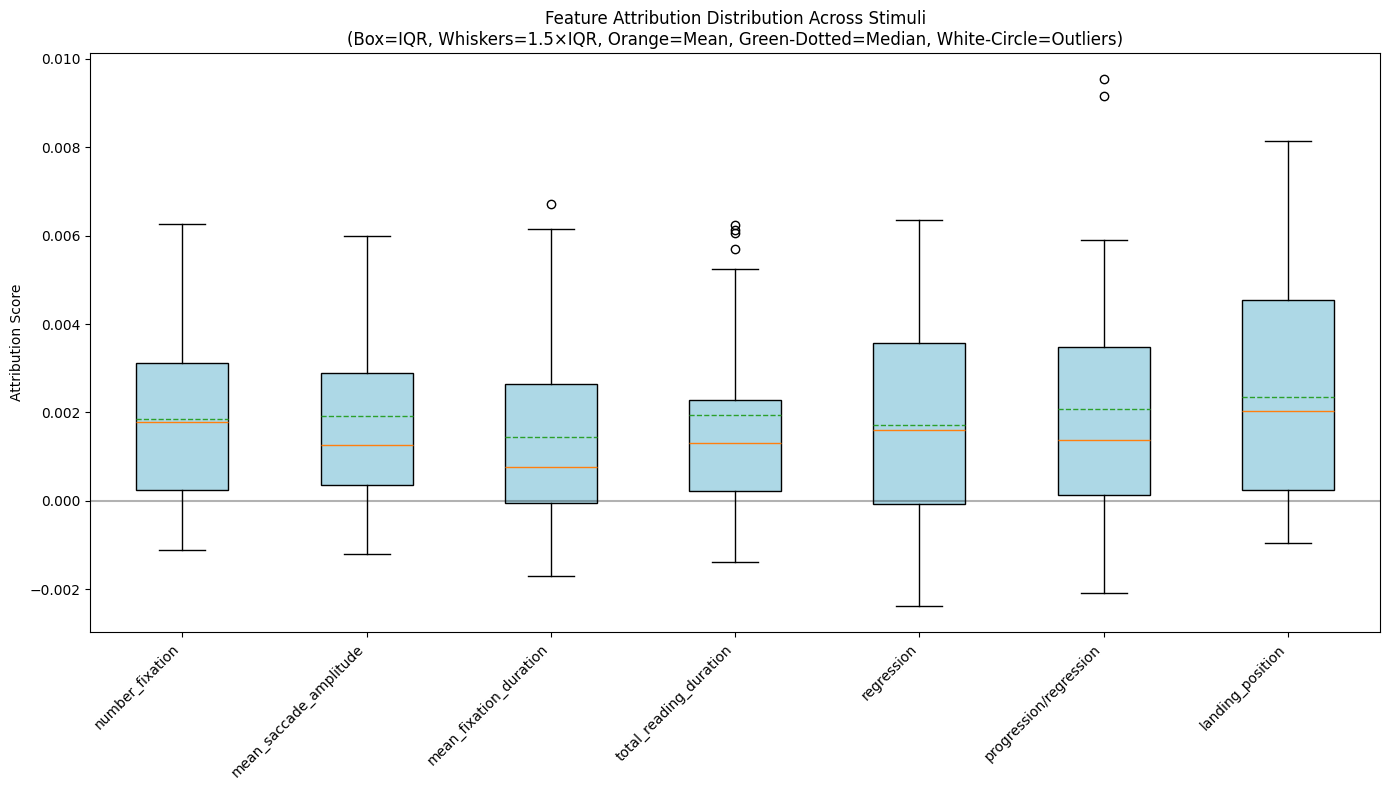


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0019, Std= 0.0020, Min=-0.0011, Max= 0.0063
mean_saccade_amplitude        : Mean= 0.0019, Std= 0.0021, Min=-0.0012, Max= 0.0060
mean_fixation_duration        : Mean= 0.0014, Std= 0.0021, Min=-0.0017, Max= 0.0067
total_reading_duration        : Mean= 0.0019, Std= 0.0022, Min=-0.0014, Max= 0.0062
regression                    : Mean= 0.0017, Std= 0.0022, Min=-0.0024, Max= 0.0064
progression/regression        : Mean= 0.0021, Std= 0.0028, Min=-0.0021, Max= 0.0095
landing_position              : Mean= 0.0023, Std= 0.0026, Min=-0.0010, Max= 0.0081


In [35]:
feature_names = [
    "number_fixation",
    "mean_saccade_amplitude",
    "mean_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "landing_position",
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

#### Original (without mean saccade amplitude)

In [36]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 6))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_fixation_duration']
        vector_roi[s][2] = Features['total_reading_duration']
        vector_roi[s][3] = Features['regression']
        vector_roi[s][4] = Features['progression/regression']
        vector_roi[s][5] = SimAndFeatureVals[s][0][0][3]

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [37]:
# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(180, 90)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(90, 45)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(45, 23) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(23, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.7667861580848694
Epoch 5 loss: 0.4791272282600403
Epoch 10 loss: 0.3810610771179199
Epoch 15 loss: 0.34507107734680176
Epoch 0 loss: 0.7700377702713013
Epoch 5 loss: 0.42339828610420227
Epoch 10 loss: 0.35790035128593445
Epoch 15 loss: 0.3275423049926758
Epoch 0 loss: 0.7439738512039185
Epoch 5 loss: 0.41909128427505493
Epoch 10 loss: 0.3236769735813141
Epoch 15 loss: 0.31740209460258484
Epoch 0 loss: 0.7108564376831055
Epoch 5 loss: 0.42761746048927307
Epoch 10 loss: 0.3413400650024414
Epoch 15 loss: 0.3319671154022217
Epoch 0 loss: 0.7469186186790466
Epoch 5 loss: 0.4475939869880676
Epoch 10 loss: 0.360322505235672
Epoch 15 loss: 0.32169944047927856
Epoch 0 loss: 0.7289536595344543
Epoch 5 loss: 0.5187522172927856
Epoch 10 loss: 0.39133331179618835
Epoch 15 loss: 0.34508392214775085
Epoch 0 loss: 0.8224056363105774
Epoch 5 loss: 0.44072091579437256
Epoch 10 loss: 0.3547520339488983
Epoch 15 loss: 0.3258717358112335
Epoch 0 loss: 0.708872377872467
Ep

In [38]:
_ = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.7667861580848694
Epoch 5 loss: 0.5123294591903687
Epoch 10 loss: 0.41654080152511597
Epoch 15 loss: 0.38170337677001953
Epoch 0 loss: 0.7700377702713013
Epoch 5 loss: 0.46276888251304626
Epoch 10 loss: 0.39332932233810425
Epoch 15 loss: 0.363517165184021
Epoch 0 loss: 0.7439738512039185
Epoch 5 loss: 0.4473888576030731
Epoch 10 loss: 0.35382047295570374
Epoch 15 loss: 0.34156689047813416
Epoch 0 loss: 0.7108564376831055
Epoch 5 loss: 0.46705394983291626
Epoch 10 loss: 0.3959123194217682
Epoch 15 loss: 0.3516901731491089
Epoch 0 loss: 0.7469186186790466
Epoch 5 loss: 0.4711361527442932
Epoch 10 loss: 0.3834957778453827
Epoch 15 loss: 0.3554953932762146
Epoch 0 loss: 0.7289536595344543
Epoch 5 loss: 0.5764028429985046
Epoch 10 loss: 0.4262441396713257
Epoch 15 loss: 0.3999727666378021
Epoch 0 loss: 0.8224056363105774
Epoch 5 loss: 0.48096030950546265
Epoch 10 loss: 0.38153108954429626
Epoch 15 loss: 0.35120677947998047
Epoch 0 loss: 0.708872377872467
Ep

Approximation Error: 0.00019481650087982416 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_7412\2144360451.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


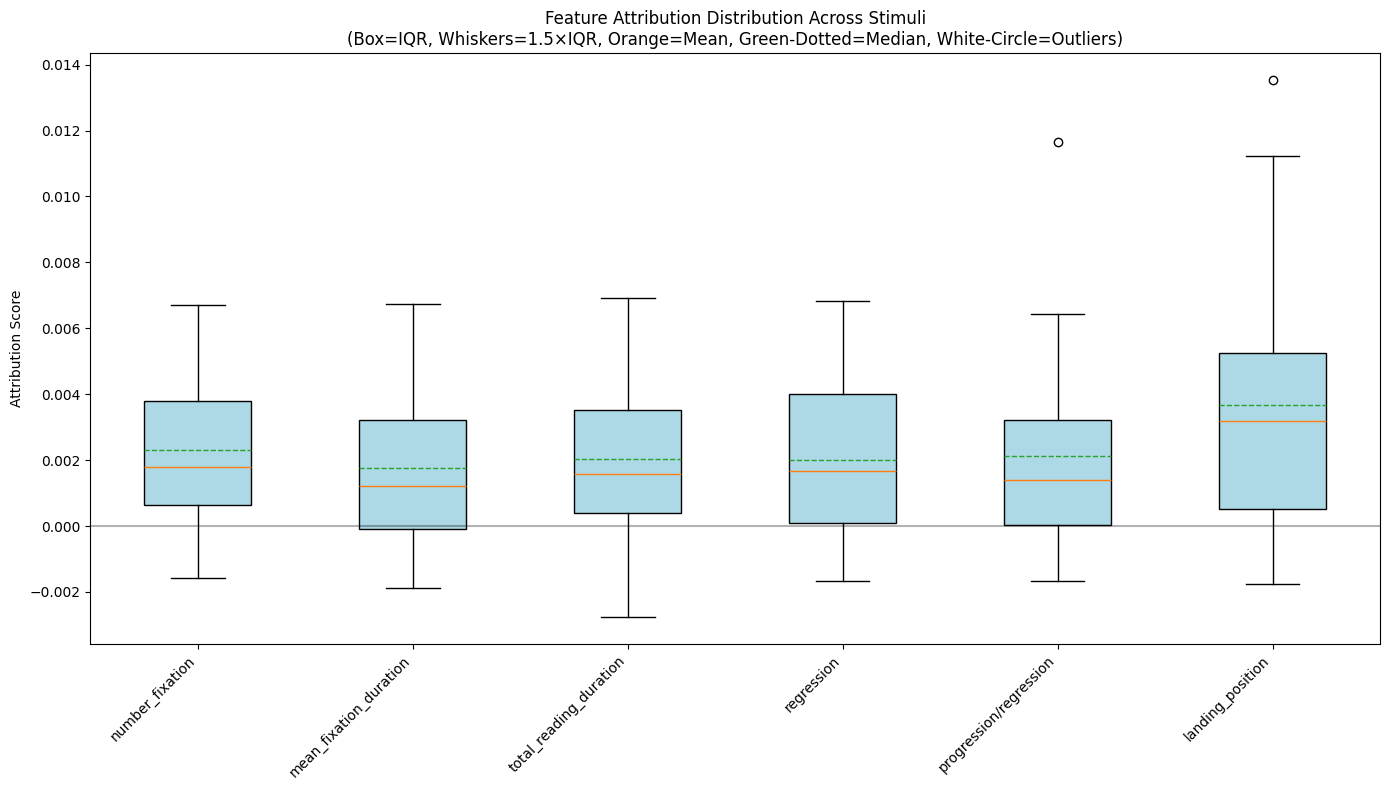


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0023, Std= 0.0023, Min=-0.0016, Max= 0.0067
mean_fixation_duration        : Mean= 0.0018, Std= 0.0025, Min=-0.0019, Max= 0.0067
total_reading_duration        : Mean= 0.0020, Std= 0.0025, Min=-0.0028, Max= 0.0069
regression                    : Mean= 0.0020, Std= 0.0023, Min=-0.0017, Max= 0.0068
progression/regression        : Mean= 0.0021, Std= 0.0029, Min=-0.0017, Max= 0.0116
landing_position              : Mean= 0.0037, Std= 0.0039, Min=-0.0018, Max= 0.0135


In [39]:
feature_names = [
    "number_fixation",
    "mean_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "landing_position",
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

#### Original + Additional Features

In [40]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 10))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_saccade_amplitude']
        vector_roi[s][2] = Features['std_saccade_amplitude']
        vector_roi[s][3] = Features['mean_fixation_duration']
        vector_roi[s][4] = Features['std_fixation_duration']
        vector_roi[s][5] = Features['total_reading_duration']
        vector_roi[s][6] = Features['regression']
        vector_roi[s][7] = Features['progression/regression']
        vector_roi[s][8] = Features['fixation_entropy']
        vector_roi[s][9] = SimAndFeatureVals[s][0][0][3] # landing of the first coordinate
    
    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [41]:
torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(300, 150)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(150, 75)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(75, 33) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(33, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.8214497566223145
Epoch 5 loss: 0.40419402718544006
Epoch 10 loss: 0.3362760543823242
Epoch 15 loss: 0.3146214485168457
Epoch 0 loss: 0.7904959321022034
Epoch 5 loss: 0.3945804834365845
Epoch 10 loss: 0.34578827023506165
Epoch 15 loss: 0.3175537586212158
Epoch 0 loss: 0.7641640901565552
Epoch 5 loss: 0.37409481406211853
Epoch 10 loss: 0.31972748041152954
Epoch 15 loss: 0.3152789771556854
Epoch 0 loss: 0.6239690780639648
Epoch 5 loss: 0.35475510358810425
Epoch 10 loss: 0.31927669048309326
Epoch 15 loss: 0.3168455958366394
Epoch 0 loss: 0.7035930156707764
Epoch 5 loss: 0.36048540472984314
Epoch 10 loss: 0.32058030366897583
Epoch 15 loss: 0.31382784247398376
Epoch 0 loss: 0.6872652173042297
Epoch 5 loss: 0.3874540627002716
Epoch 10 loss: 0.3331656754016876
Epoch 15 loss: 0.32827597856521606
Epoch 0 loss: 0.7150274515151978
Epoch 5 loss: 0.3792348802089691
Epoch 10 loss: 0.3271421194076538
Epoch 15 loss: 0.32307156920433044
Epoch 0 loss: 0.6621307730674744

In [42]:
_ = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.8214497566223145
Epoch 5 loss: 0.4124031066894531
Epoch 10 loss: 0.35696059465408325
Epoch 15 loss: 0.32656702399253845
Epoch 0 loss: 0.7904959321022034
Epoch 5 loss: 0.42200934886932373
Epoch 10 loss: 0.37388020753860474
Epoch 15 loss: 0.3482432961463928
Epoch 0 loss: 0.7641640901565552
Epoch 5 loss: 0.40022793412208557
Epoch 10 loss: 0.3424680829048157
Epoch 15 loss: 0.3295976519584656
Epoch 0 loss: 0.6239690780639648
Epoch 5 loss: 0.37723061442375183
Epoch 10 loss: 0.3428790271282196
Epoch 15 loss: 0.33633989095687866
Epoch 0 loss: 0.7035930156707764
Epoch 5 loss: 0.3756249248981476
Epoch 10 loss: 0.34306561946868896
Epoch 15 loss: 0.32299795746803284
Epoch 0 loss: 0.6872652173042297
Epoch 5 loss: 0.4033035337924957
Epoch 10 loss: 0.3518695533275604
Epoch 15 loss: 0.3432517349720001
Epoch 0 loss: 0.7150274515151978
Epoch 5 loss: 0.4013661742210388
Epoch 10 loss: 0.35992148518562317
Epoch 15 loss: 0.3441348969936371
Epoch 0 loss: 0.6621307730674744


Approximation Error: 1.689296550466679e-05 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_7412\2144360451.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


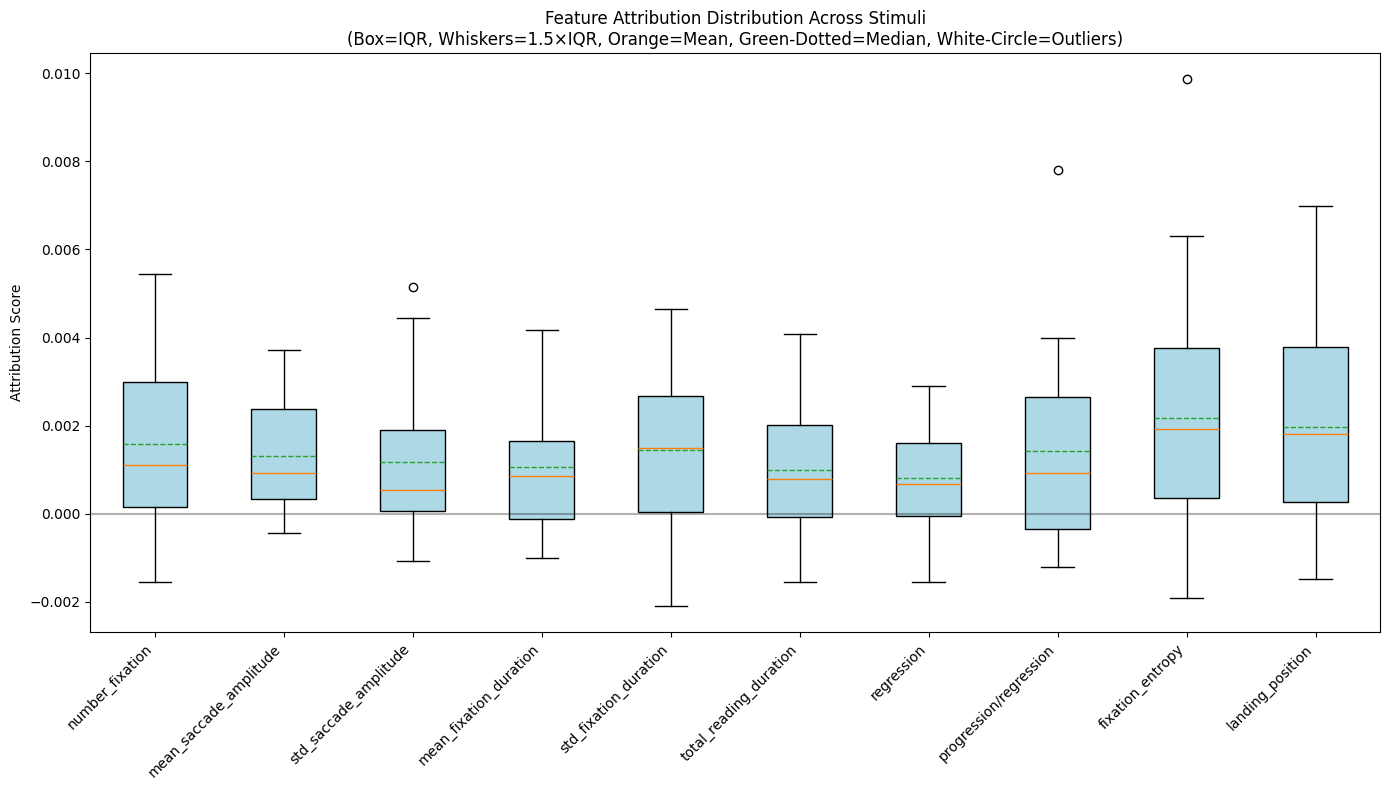


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0016, Std= 0.0018, Min=-0.0015, Max= 0.0054
mean_saccade_amplitude        : Mean= 0.0013, Std= 0.0013, Min=-0.0004, Max= 0.0037
std_saccade_amplitude         : Mean= 0.0012, Std= 0.0017, Min=-0.0011, Max= 0.0052
mean_fixation_duration        : Mean= 0.0011, Std= 0.0014, Min=-0.0010, Max= 0.0042
std_fixation_duration         : Mean= 0.0015, Std= 0.0016, Min=-0.0021, Max= 0.0047
total_reading_duration        : Mean= 0.0010, Std= 0.0014, Min=-0.0015, Max= 0.0041
regression                    : Mean= 0.0008, Std= 0.0012, Min=-0.0015, Max= 0.0029
progression/regression        : Mean= 0.0014, Std= 0.0020, Min=-0.0012, Max= 0.0078
fixation_entropy              : Mean= 0.0022, Std= 0.0025, Min=-0.0019, Max= 0.0099
landing_position              : Mean= 0.0020, Std= 0.0023, Min=-0.0015, Max= 0.0070


In [43]:
feature_names = [
    "number_fixation",
    "mean_saccade_amplitude",
    "std_saccade_amplitude",
    "mean_fixation_duration",
    "std_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "fixation_entropy",
    "landing_position"
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

#### Original and Similarity features (Avg + Std)

In [44]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 11))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_saccade_amplitude']
        vector_roi[s][2] = Features['mean_fixation_duration']
        vector_roi[s][3] = Features['total_reading_duration']
        vector_roi[s][4] = Features['regression']
        vector_roi[s][5] = Features['progression/regression']
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][3] # landing of the first coordinate
        vector_roi[s][7] = SimAndFeatureVals[s][0][0][4] # mean saccade similarity group 0
        vector_roi[s][8] = SimAndFeatureVals[s][0][0][5] # mean saccade similarity group 1
        vector_roi[s][9] = SimAndFeatureVals[s][0][0][6] # std saccade similarity group 0
        vector_roi[s][10] = SimAndFeatureVals[s][0][0][7] # std saccade similarity group 1

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [45]:
torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(330, 165)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(165, 83)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(83, 42) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(42, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x

In [46]:
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.7381104826927185
Epoch 5 loss: 0.3650893568992615
Epoch 10 loss: 0.33448153734207153
Epoch 15 loss: 0.317640483379364
Epoch 0 loss: 0.6868277192115784
Epoch 5 loss: 0.37968873977661133
Epoch 10 loss: 0.32516536116600037
Epoch 15 loss: 0.313909649848938
Epoch 0 loss: 0.7267523407936096
Epoch 5 loss: 0.38504377007484436
Epoch 10 loss: 0.33297139406204224
Epoch 15 loss: 0.3238339126110077
Epoch 0 loss: 0.7480664849281311
Epoch 5 loss: 0.4074961841106415
Epoch 10 loss: 0.3345945477485657
Epoch 15 loss: 0.32438474893569946
Epoch 0 loss: 0.7085253596305847
Epoch 5 loss: 0.39668095111846924
Epoch 10 loss: 0.3406091630458832
Epoch 15 loss: 0.32925280928611755
Epoch 0 loss: 0.7045243382453918
Epoch 5 loss: 0.4067649245262146
Epoch 10 loss: 0.33387699723243713
Epoch 15 loss: 0.3152655065059662
Epoch 0 loss: 0.7595713138580322
Epoch 5 loss: 0.38252121210098267
Epoch 10 loss: 0.3261665999889374
Epoch 15 loss: 0.317586213350296
Epoch 0 loss: 0.7154556512832642
Epo

In [47]:
_ = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.7381104826927185
Epoch 5 loss: 0.38543054461479187
Epoch 10 loss: 0.34713029861450195
Epoch 15 loss: 0.331550657749176
Epoch 0 loss: 0.6868277192115784
Epoch 5 loss: 0.40566486120224
Epoch 10 loss: 0.3474750518798828
Epoch 15 loss: 0.33002790808677673
Epoch 0 loss: 0.7267523407936096
Epoch 5 loss: 0.41256898641586304
Epoch 10 loss: 0.34724000096321106
Epoch 15 loss: 0.32549208402633667
Epoch 0 loss: 0.7480664849281311
Epoch 5 loss: 0.4407345652580261
Epoch 10 loss: 0.3574003279209137
Epoch 15 loss: 0.34691542387008667
Epoch 0 loss: 0.7085253596305847
Epoch 5 loss: 0.4321119487285614
Epoch 10 loss: 0.3701002895832062
Epoch 15 loss: 0.3331255614757538
Epoch 0 loss: 0.7045243382453918
Epoch 5 loss: 0.4448939561843872
Epoch 10 loss: 0.3591025471687317
Epoch 15 loss: 0.3355681896209717
Epoch 0 loss: 0.7595713138580322
Epoch 5 loss: 0.4128946363925934
Epoch 10 loss: 0.34401804208755493
Epoch 15 loss: 0.3314526379108429
Epoch 0 loss: 0.7154556512832642
Epoch

Approximation Error: -0.00011987701873295009 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_7412\2144360451.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


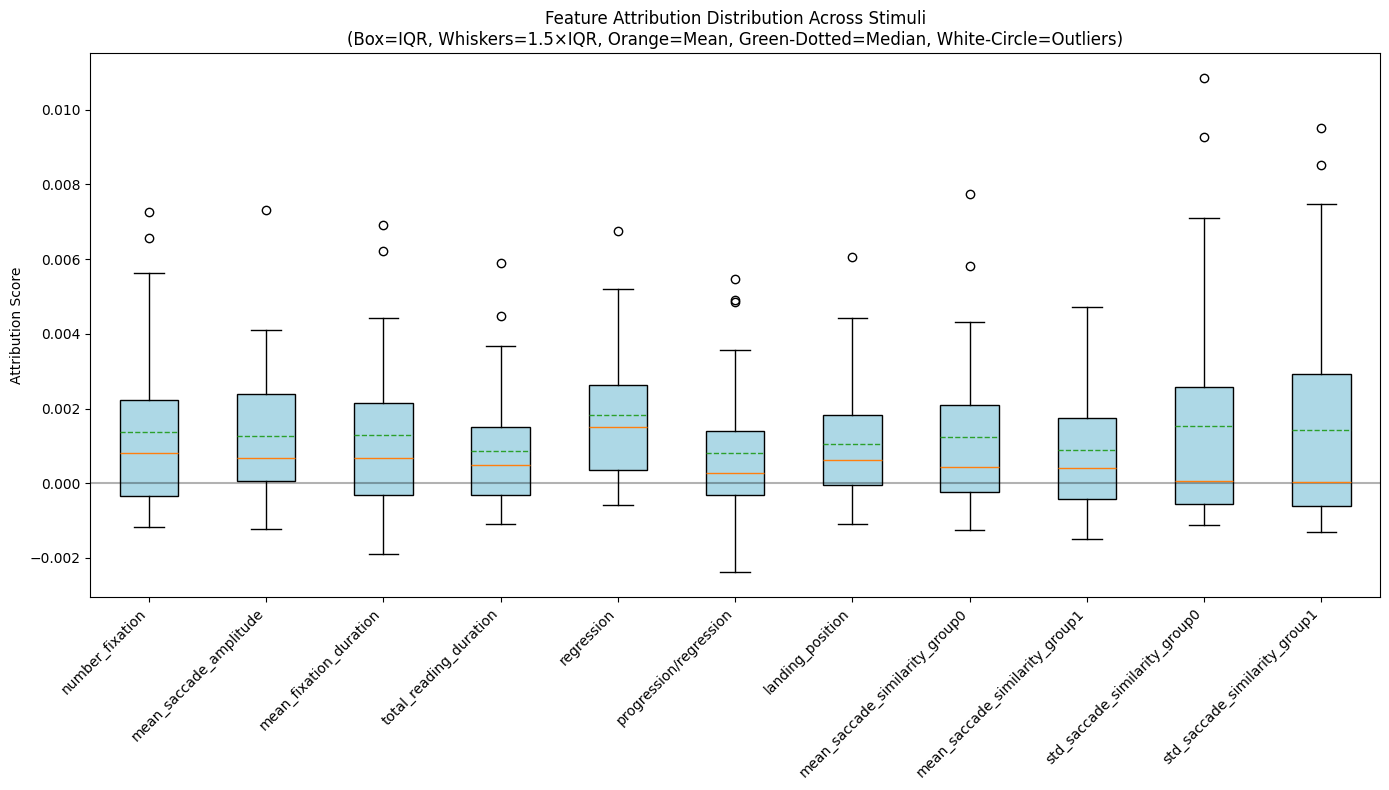


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0014, Std= 0.0022, Min=-0.0012, Max= 0.0073
mean_saccade_amplitude        : Mean= 0.0013, Std= 0.0018, Min=-0.0012, Max= 0.0073
mean_fixation_duration        : Mean= 0.0013, Std= 0.0022, Min=-0.0019, Max= 0.0069
total_reading_duration        : Mean= 0.0009, Std= 0.0017, Min=-0.0011, Max= 0.0059
regression                    : Mean= 0.0018, Std= 0.0019, Min=-0.0006, Max= 0.0068
progression/regression        : Mean= 0.0008, Std= 0.0018, Min=-0.0024, Max= 0.0055
landing_position              : Mean= 0.0011, Std= 0.0017, Min=-0.0011, Max= 0.0061
mean_saccade_similarity_group0: Mean= 0.0012, Std= 0.0021, Min=-0.0013, Max= 0.0077
mean_saccade_similarity_group1: Mean= 0.0009, Std= 0.0017, Min=-0.0015, Max= 0.0047
std_saccade_similarity_group0 : Mean= 0.0015, Std= 0.0032, Min=-0.0011, Max= 0.0109
std_saccade_similarity_group1 : Mean= 0.0014, Std= 0.0029, Min=-0.001

In [48]:
feature_names = [
    "number_fixation",
    "mean_saccade_amplitude",
    "mean_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "landing_position",
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
    "std_saccade_similarity_group0",
    "std_saccade_similarity_group1"
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

#### Original and Avg Similarity

In [49]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 9))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_saccade_amplitude']
        vector_roi[s][2] = Features['mean_fixation_duration']
        vector_roi[s][3] = Features['total_reading_duration']
        vector_roi[s][4] = Features['regression']
        vector_roi[s][5] = Features['progression/regression']
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][3] # landing of the first coordinate
        vector_roi[s][7] = SimAndFeatureVals[s][0][0][4] # mean saccade similarity group 0
        vector_roi[s][8] = SimAndFeatureVals[s][0][0][5] # mean saccade similarity group 1

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [50]:
torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(270, 130)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(130, 65)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(65, 33) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(33, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.7587812542915344
Epoch 5 loss: 0.4157922565937042
Epoch 10 loss: 0.3541352152824402
Epoch 15 loss: 0.3281523287296295
Epoch 0 loss: 0.7218181490898132
Epoch 5 loss: 0.4012007415294647
Epoch 10 loss: 0.3334899842739105
Epoch 15 loss: 0.3244889974594116
Epoch 0 loss: 0.7182842493057251
Epoch 5 loss: 0.3983347415924072
Epoch 10 loss: 0.32947519421577454
Epoch 15 loss: 0.3170514702796936
Epoch 0 loss: 0.7560874819755554
Epoch 5 loss: 0.4314895272254944
Epoch 10 loss: 0.3435862064361572
Epoch 15 loss: 0.3349752724170685
Epoch 0 loss: 0.7854102849960327
Epoch 5 loss: 0.4166871905326843
Epoch 10 loss: 0.33207571506500244
Epoch 15 loss: 0.314904123544693
Epoch 0 loss: 0.7433587312698364
Epoch 5 loss: 0.42268192768096924
Epoch 10 loss: 0.3486880660057068
Epoch 15 loss: 0.32201534509658813
Epoch 0 loss: 0.7041778564453125
Epoch 5 loss: 0.392931193113327
Epoch 10 loss: 0.3301464319229126
Epoch 15 loss: 0.3145744800567627
Epoch 0 loss: 0.6708100438117981
Epoch 5 

In [51]:
results = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.7587812542915344
Epoch 5 loss: 0.4482128322124481
Epoch 10 loss: 0.40044721961021423
Epoch 15 loss: 0.35281550884246826
Epoch 0 loss: 0.7218181490898132
Epoch 5 loss: 0.44059792160987854
Epoch 10 loss: 0.37350860238075256
Epoch 15 loss: 0.3518647849559784
Epoch 0 loss: 0.7182842493057251
Epoch 5 loss: 0.42777347564697266
Epoch 10 loss: 0.3602346181869507
Epoch 15 loss: 0.3380207121372223
Epoch 0 loss: 0.7560874819755554
Epoch 5 loss: 0.4761606454849243
Epoch 10 loss: 0.396128386259079
Epoch 15 loss: 0.3574851453304291
Epoch 0 loss: 0.7854102849960327
Epoch 5 loss: 0.4487694501876831
Epoch 10 loss: 0.3666810691356659
Epoch 15 loss: 0.3331458866596222
Epoch 0 loss: 0.7433587312698364
Epoch 5 loss: 0.45289346575737
Epoch 10 loss: 0.3857981562614441
Epoch 15 loss: 0.3454565703868866
Epoch 0 loss: 0.7041778564453125
Epoch 5 loss: 0.4247375726699829
Epoch 10 loss: 0.34973883628845215
Epoch 15 loss: 0.32453542947769165
Epoch 0 loss: 0.6708100438117981
Epoch 

Approximation Error: -0.00015796950901858509 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_7412\2144360451.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


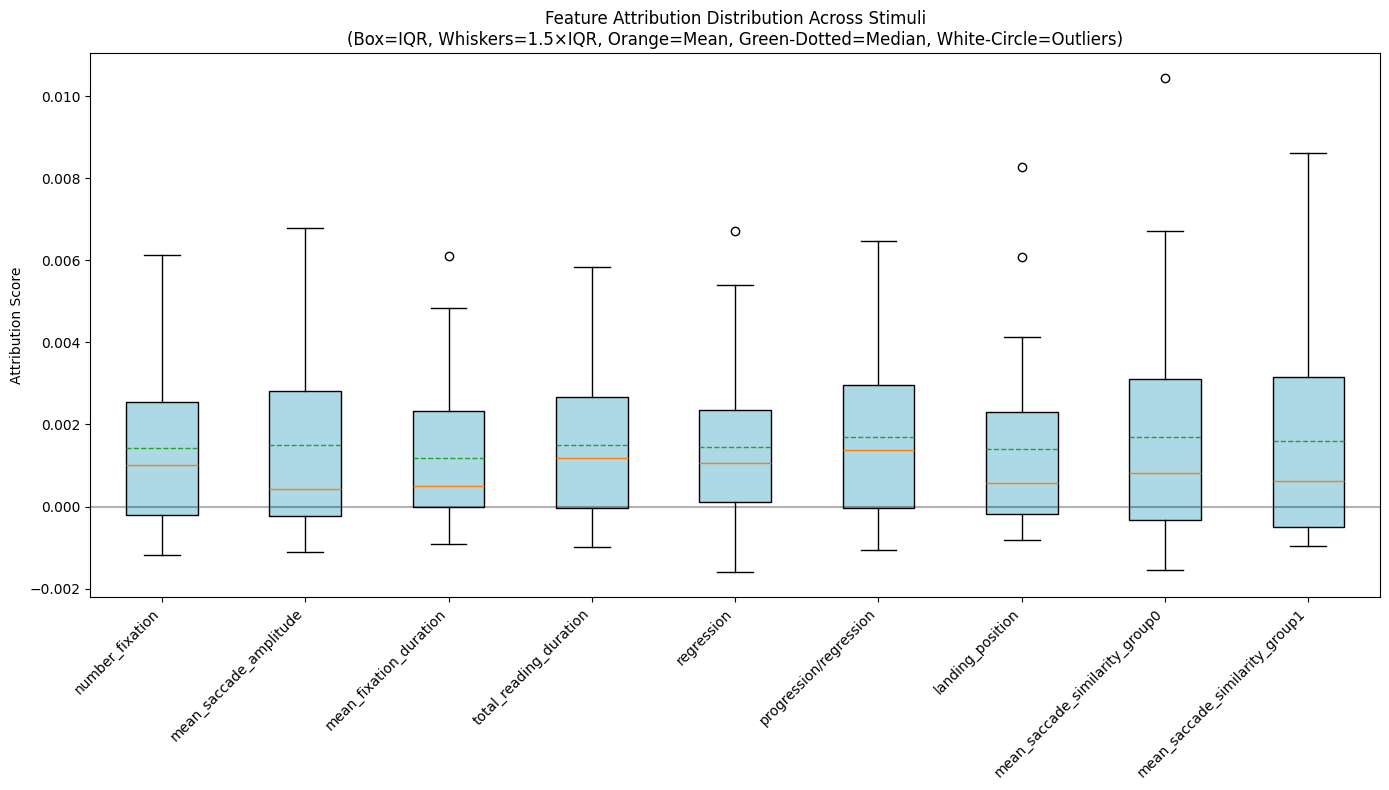


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0014, Std= 0.0020, Min=-0.0012, Max= 0.0061
mean_saccade_amplitude        : Mean= 0.0015, Std= 0.0022, Min=-0.0011, Max= 0.0068
mean_fixation_duration        : Mean= 0.0012, Std= 0.0017, Min=-0.0009, Max= 0.0061
total_reading_duration        : Mean= 0.0015, Std= 0.0020, Min=-0.0010, Max= 0.0058
regression                    : Mean= 0.0015, Std= 0.0020, Min=-0.0016, Max= 0.0067
progression/regression        : Mean= 0.0017, Std= 0.0019, Min=-0.0011, Max= 0.0065
landing_position              : Mean= 0.0014, Std= 0.0021, Min=-0.0008, Max= 0.0083
mean_saccade_similarity_group0: Mean= 0.0017, Std= 0.0027, Min=-0.0016, Max= 0.0105
mean_saccade_similarity_group1: Mean= 0.0016, Std= 0.0026, Min=-0.0010, Max= 0.0086


In [52]:
feature_names = [
    "number_fixation",
    "mean_saccade_amplitude",
    "mean_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "landing_position",
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

#### Original and Avg Similarity features (no mean saccade amplitude)

In [53]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 8))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_fixation_duration']
        vector_roi[s][2] = Features['total_reading_duration']
        vector_roi[s][3] = Features['regression']
        vector_roi[s][4] = Features['progression/regression']
        vector_roi[s][5] = SimAndFeatureVals[s][0][0][3]
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][4]
        vector_roi[s][7] = SimAndFeatureVals[s][0][0][5]

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [54]:
torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(240, 120)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(120, 60)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(60, 30) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(30, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.7551987767219543
Epoch 5 loss: 0.39778822660446167
Epoch 10 loss: 0.3391820788383484
Epoch 15 loss: 0.31390032172203064
Epoch 0 loss: 0.6822564005851746
Epoch 5 loss: 0.406947523355484
Epoch 10 loss: 0.33898285031318665
Epoch 15 loss: 0.3262108564376831
Epoch 0 loss: 0.7306356430053711
Epoch 5 loss: 0.4236612319946289
Epoch 10 loss: 0.3262651264667511
Epoch 15 loss: 0.31492623686790466
Epoch 0 loss: 0.6698370575904846
Epoch 5 loss: 0.40784600377082825
Epoch 10 loss: 0.3284841477870941
Epoch 15 loss: 0.3317404091358185
Epoch 0 loss: 0.700255274772644
Epoch 5 loss: 0.40991103649139404
Epoch 10 loss: 0.350243479013443
Epoch 15 loss: 0.3252173066139221
Epoch 0 loss: 0.7170079946517944
Epoch 5 loss: 0.35406044125556946
Epoch 10 loss: 0.32605984807014465
Epoch 15 loss: 0.32325291633605957
Epoch 0 loss: 0.7805202603340149
Epoch 5 loss: 0.39117270708084106
Epoch 10 loss: 0.329650342464447
Epoch 15 loss: 0.3157069981098175
Epoch 0 loss: 0.7407883405685425
Epoc

In [55]:
_ = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.7551987767219543
Epoch 5 loss: 0.4338701367378235
Epoch 10 loss: 0.3699607849121094
Epoch 15 loss: 0.32983657717704773
Epoch 0 loss: 0.6822564005851746
Epoch 5 loss: 0.4328237473964691
Epoch 10 loss: 0.3727474808692932
Epoch 15 loss: 0.36073943972587585
Epoch 0 loss: 0.7306356430053711
Epoch 5 loss: 0.4612831473350525
Epoch 10 loss: 0.36631637811660767
Epoch 15 loss: 0.34202811121940613
Epoch 0 loss: 0.6698370575904846
Epoch 5 loss: 0.4507112205028534
Epoch 10 loss: 0.34665337204933167
Epoch 15 loss: 0.36238497495651245
Epoch 0 loss: 0.700255274772644
Epoch 5 loss: 0.43445003032684326
Epoch 10 loss: 0.3979592025279999
Epoch 15 loss: 0.341937780380249
Epoch 0 loss: 0.7170079946517944
Epoch 5 loss: 0.37572142481803894
Epoch 10 loss: 0.3618805408477783
Epoch 15 loss: 0.3428972661495209
Epoch 0 loss: 0.7805202603340149
Epoch 5 loss: 0.4103838801383972
Epoch 10 loss: 0.3564791977405548
Epoch 15 loss: 0.327518492937088
Epoch 0 loss: 0.7407883405685425
Epoch

Approximation Error: -0.00013389340892899781 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_7412\2144360451.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


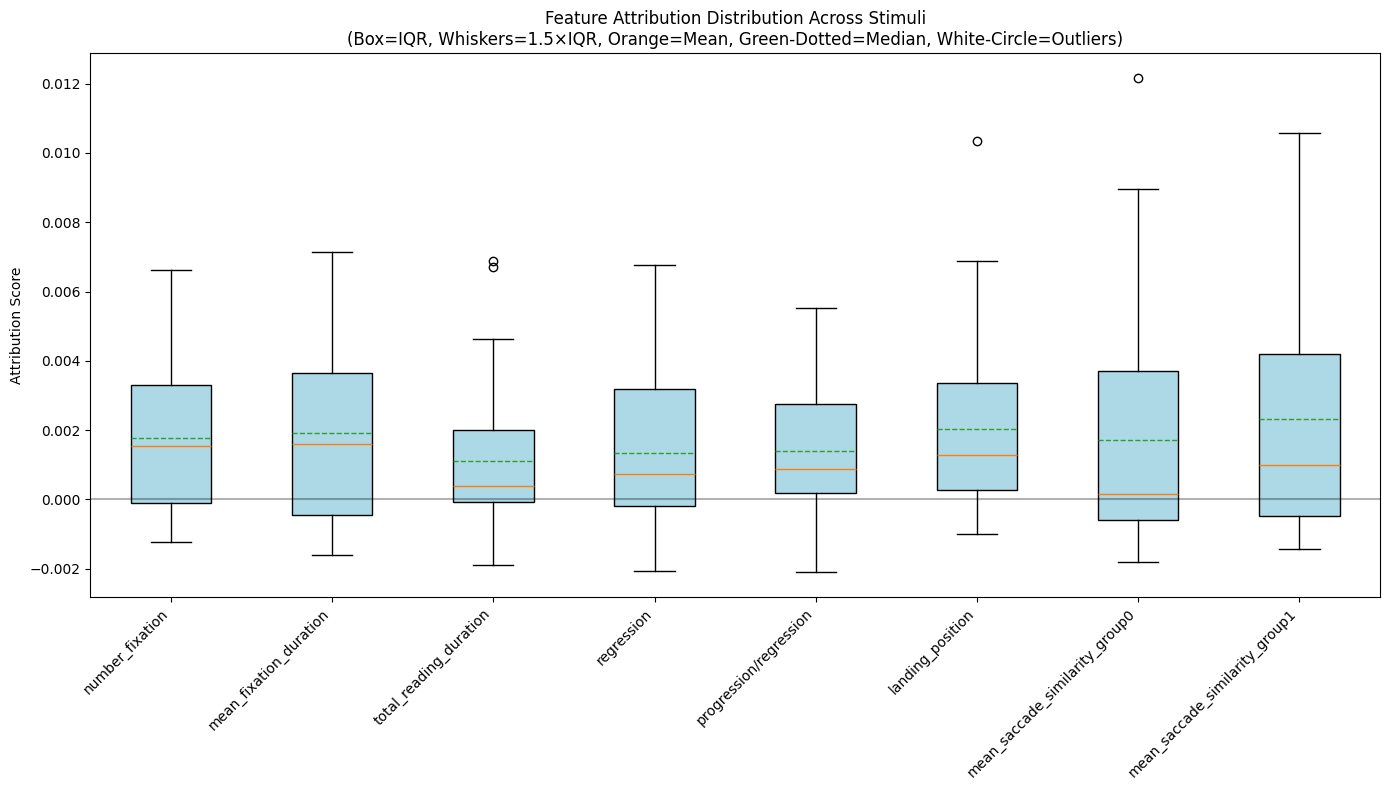


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0018, Std= 0.0023, Min=-0.0012, Max= 0.0066
mean_fixation_duration        : Mean= 0.0019, Std= 0.0027, Min=-0.0016, Max= 0.0071
total_reading_duration        : Mean= 0.0011, Std= 0.0021, Min=-0.0019, Max= 0.0069
regression                    : Mean= 0.0014, Std= 0.0022, Min=-0.0021, Max= 0.0068
progression/regression        : Mean= 0.0014, Std= 0.0021, Min=-0.0021, Max= 0.0055
landing_position              : Mean= 0.0020, Std= 0.0026, Min=-0.0010, Max= 0.0103
mean_saccade_similarity_group0: Mean= 0.0017, Std= 0.0033, Min=-0.0018, Max= 0.0122
mean_saccade_similarity_group1: Mean= 0.0023, Std= 0.0035, Min=-0.0014, Max= 0.0106


In [56]:
feature_names = [
    "number_fixation",
    "mean_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "landing_position",
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

In [57]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 10))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_fixation_duration']
        vector_roi[s][2] = Features['total_reading_duration']
        vector_roi[s][3] = Features['regression']
        vector_roi[s][4] = Features['progression/regression']
        vector_roi[s][5] = SimAndFeatureVals[s][0][0][3] # landing of the first coordinate
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][4] # mean saccade similarity group 0
        vector_roi[s][7] = SimAndFeatureVals[s][0][0][5] # mean saccade similarity group 1
        vector_roi[s][8] = SimAndFeatureVals[s][0][0][6] # std saccade similarity group 0
        vector_roi[s][9] = SimAndFeatureVals[s][0][0][7] # std saccade similarity group 1

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [58]:
torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(300, 150)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(150, 75)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(75, 32) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(32, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)
results = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.7506638765335083
Epoch 5 loss: 0.4037398397922516
Epoch 10 loss: 0.32532066106796265
Epoch 15 loss: 0.3179202079772949
Epoch 0 loss: 0.7350313663482666
Epoch 5 loss: 0.4367773234844208
Epoch 10 loss: 0.3524571657180786
Epoch 15 loss: 0.33169811964035034
Epoch 0 loss: 0.7121278643608093
Epoch 5 loss: 0.37949255108833313
Epoch 10 loss: 0.3313418924808502
Epoch 15 loss: 0.32661673426628113
Epoch 0 loss: 0.6744570732116699
Epoch 5 loss: 0.38897088170051575
Epoch 10 loss: 0.3220946490764618
Epoch 15 loss: 0.3171231150627136
Epoch 0 loss: 0.6767274141311646
Epoch 5 loss: 0.3787485361099243
Epoch 10 loss: 0.3209224045276642
Epoch 15 loss: 0.31509658694267273
Epoch 0 loss: 0.742674708366394
Epoch 5 loss: 0.4130130112171173
Epoch 10 loss: 0.3391074538230896
Epoch 15 loss: 0.31654787063598633
Epoch 0 loss: 0.7290486097335815
Epoch 5 loss: 0.4015404284000397
Epoch 10 loss: 0.3422718346118927
Epoch 15 loss: 0.32432499527931213
Epoch 0 loss: 0.7139955163002014
Epo

Approximation Error: -0.00013639431563206017 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_7412\2144360451.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


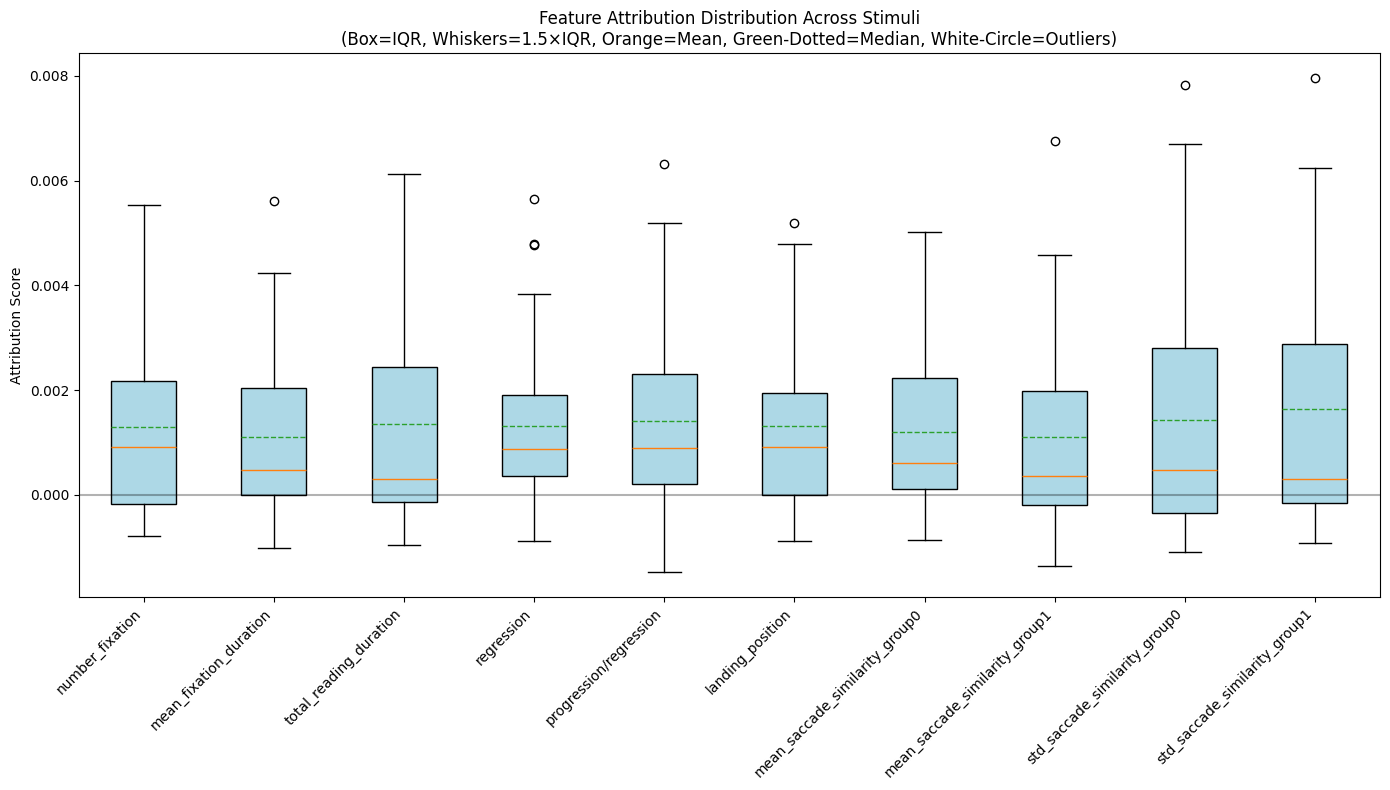


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0013, Std= 0.0017, Min=-0.0008, Max= 0.0055
mean_fixation_duration        : Mean= 0.0011, Std= 0.0016, Min=-0.0010, Max= 0.0056
total_reading_duration        : Mean= 0.0014, Std= 0.0020, Min=-0.0010, Max= 0.0061
regression                    : Mean= 0.0013, Std= 0.0016, Min=-0.0009, Max= 0.0057
progression/regression        : Mean= 0.0014, Std= 0.0018, Min=-0.0015, Max= 0.0063
landing_position              : Mean= 0.0013, Std= 0.0017, Min=-0.0009, Max= 0.0052
mean_saccade_similarity_group0: Mean= 0.0012, Std= 0.0015, Min=-0.0009, Max= 0.0050
mean_saccade_similarity_group1: Mean= 0.0011, Std= 0.0019, Min=-0.0014, Max= 0.0068
std_saccade_similarity_group0 : Mean= 0.0014, Std= 0.0025, Min=-0.0011, Max= 0.0078
std_saccade_similarity_group1 : Mean= 0.0016, Std= 0.0024, Min=-0.0009, Max= 0.0080


In [59]:
feature_names = [
    "number_fixation",
    "mean_fixation_duration", 
    "total_reading_duration",
    "regression",
    "progression/regression",
    "landing_position",
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
    "std_saccade_similarity_group0",
    "std_saccade_similarity_group1"
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

#### 

#### All features

In [60]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 14))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_saccade_amplitude']
        vector_roi[s][2] = Features['std_fixation_duration']
        vector_roi[s][3] = Features['mean_fixation_duration']
        vector_roi[s][4] = Features['std_fixation_duration']
        vector_roi[s][5] = Features['total_reading_duration']
        vector_roi[s][6] = Features['regression']
        vector_roi[s][7] = Features['progression/regression']
        vector_roi[s][8] = Features['fixation_entropy']
        vector_roi[s][9] = SimAndFeatureVals[s][0][0][3]
        vector_roi[s][10] = SimAndFeatureVals[s][0][0][4]
        vector_roi[s][11] = SimAndFeatureVals[s][0][0][5]
        vector_roi[s][12] = SimAndFeatureVals[s][0][0][6]
        vector_roi[s][13] = SimAndFeatureVals[s][0][0][7]
        
    
    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [61]:
torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(420, 210)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(210, 105)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(105, 53) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(53, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.7616139650344849
Epoch 5 loss: 0.3736356496810913
Epoch 10 loss: 0.3228530287742615
Epoch 15 loss: 0.31462371349334717
Epoch 0 loss: 0.7371026277542114
Epoch 5 loss: 0.37497228384017944
Epoch 10 loss: 0.32005393505096436
Epoch 15 loss: 0.31367114186286926
Epoch 0 loss: 0.7761510610580444
Epoch 5 loss: 0.38838082551956177
Epoch 10 loss: 0.3267640769481659
Epoch 15 loss: 0.3148718774318695
Epoch 0 loss: 0.6806995868682861
Epoch 5 loss: 0.36531996726989746
Epoch 10 loss: 0.3237338960170746
Epoch 15 loss: 0.31387847661972046
Epoch 0 loss: 0.6857765316963196
Epoch 5 loss: 0.3467859625816345
Epoch 10 loss: 0.31850504875183105
Epoch 15 loss: 0.31395551562309265
Epoch 0 loss: 0.7209146022796631
Epoch 5 loss: 0.3725183606147766
Epoch 10 loss: 0.31760305166244507
Epoch 15 loss: 0.3164045512676239
Epoch 0 loss: 0.6941887736320496
Epoch 5 loss: 0.3527129292488098
Epoch 10 loss: 0.31560245156288147
Epoch 15 loss: 0.31732332706451416
Epoch 0 loss: 0.760996460914611

In [62]:
_ = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.7616139650344849
Epoch 5 loss: 0.3998557925224304
Epoch 10 loss: 0.34637129306793213
Epoch 15 loss: 0.3303980827331543
Epoch 0 loss: 0.7371026277542114
Epoch 5 loss: 0.3976592421531677
Epoch 10 loss: 0.3445062041282654
Epoch 15 loss: 0.32395505905151367
Epoch 0 loss: 0.7761510610580444
Epoch 5 loss: 0.4078996777534485
Epoch 10 loss: 0.3530060052871704
Epoch 15 loss: 0.32941296696662903
Epoch 0 loss: 0.6806995868682861
Epoch 5 loss: 0.3961280286312103
Epoch 10 loss: 0.35224011540412903
Epoch 15 loss: 0.32321897149086
Epoch 0 loss: 0.6857765316963196
Epoch 5 loss: 0.37074077129364014
Epoch 10 loss: 0.33131352066993713
Epoch 15 loss: 0.32086753845214844
Epoch 0 loss: 0.7209146022796631
Epoch 5 loss: 0.40165695548057556
Epoch 10 loss: 0.3345212936401367
Epoch 15 loss: 0.3289870023727417
Epoch 0 loss: 0.6941887736320496
Epoch 5 loss: 0.371337890625
Epoch 10 loss: 0.3313750624656677
Epoch 15 loss: 0.32996663451194763
Epoch 0 loss: 0.7609964609146118
Epoch 5

Approximation Error: 0.00020061338727828115 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_7412\2144360451.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


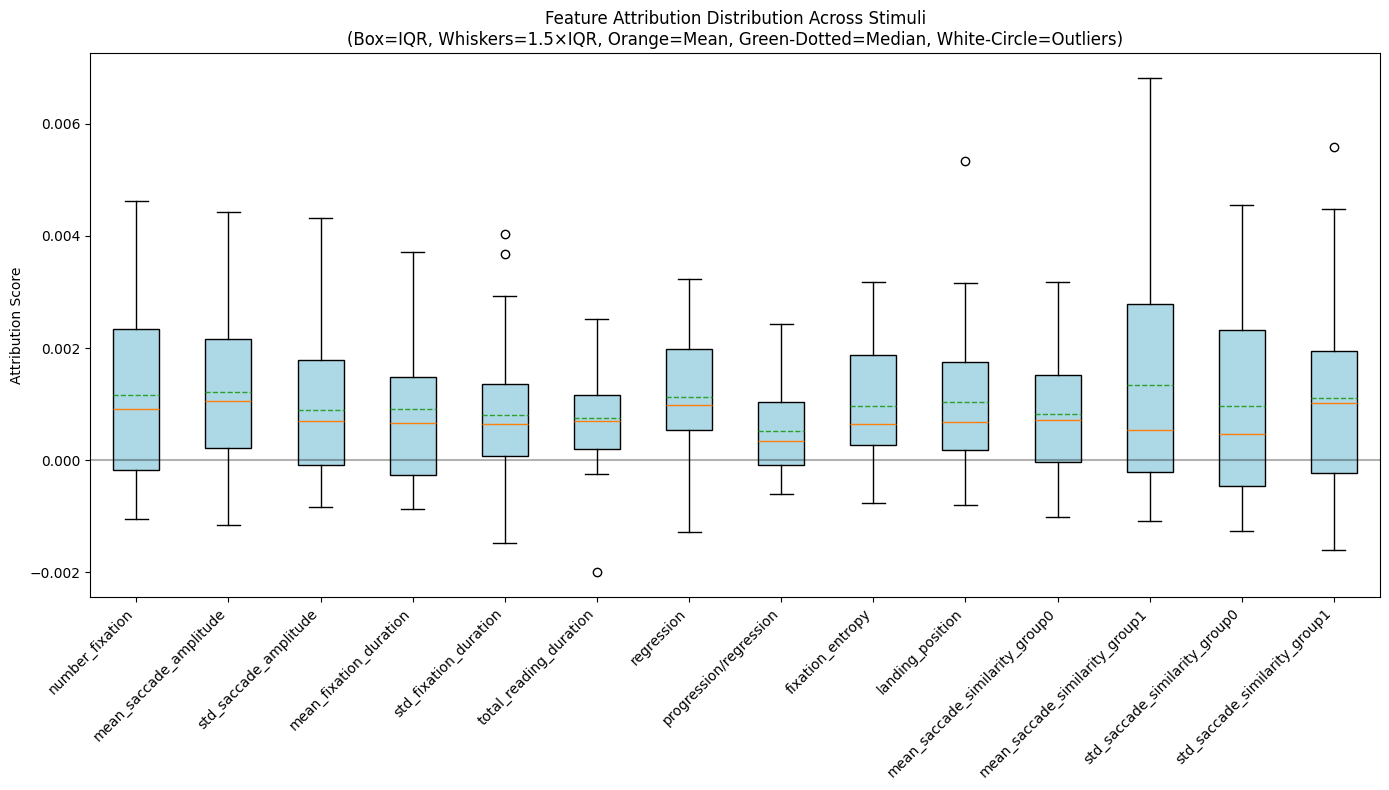


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0012, Std= 0.0016, Min=-0.0011, Max= 0.0046
mean_saccade_amplitude        : Mean= 0.0012, Std= 0.0014, Min=-0.0012, Max= 0.0044
std_saccade_amplitude         : Mean= 0.0009, Std= 0.0013, Min=-0.0008, Max= 0.0043
mean_fixation_duration        : Mean= 0.0009, Std= 0.0014, Min=-0.0009, Max= 0.0037
std_fixation_duration         : Mean= 0.0008, Std= 0.0013, Min=-0.0015, Max= 0.0040
total_reading_duration        : Mean= 0.0007, Std= 0.0009, Min=-0.0020, Max= 0.0025
regression                    : Mean= 0.0011, Std= 0.0011, Min=-0.0013, Max= 0.0032
progression/regression        : Mean= 0.0005, Std= 0.0008, Min=-0.0006, Max= 0.0024
fixation_entropy              : Mean= 0.0010, Std= 0.0011, Min=-0.0008, Max= 0.0032
landing_position              : Mean= 0.0010, Std= 0.0013, Min=-0.0008, Max= 0.0053
mean_saccade_similarity_group0: Mean= 0.0008, Std= 0.0011, Min=-0.001

In [63]:
feature_names = [
    "number_fixation",
    "mean_saccade_amplitude",
    "std_saccade_amplitude",
    "mean_fixation_duration",
    "std_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "fixation_entropy",
    "landing_position",
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
    "std_saccade_similarity_group0",
    "std_saccade_similarity_group1"
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

---

In [64]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 8))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['regression']
        vector_roi[s][2] = Features['progression/regression']
        vector_roi[s][3] = SimAndFeatureVals[s][0][0][3]
        vector_roi[s][4] = SimAndFeatureVals[s][0][0][4]
        vector_roi[s][5] = SimAndFeatureVals[s][0][0][5] 
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][6] 
        vector_roi[s][7] = SimAndFeatureVals[s][0][0][7]

    if vec.size != 0: 
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [65]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(240, 120)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(120, 60)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(60, 30) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(30, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    

results = train_test_pipeline(stimuli)
results = train_test_pipeline(stimuli,0.5)

Using device: cuda
Epoch 0 loss: 0.7566291093826294
Epoch 5 loss: 0.4847160875797272
Epoch 10 loss: 0.3850143551826477
Epoch 15 loss: 0.3275628387928009
Epoch 0 loss: 0.7462884783744812
Epoch 5 loss: 0.48213446140289307
Epoch 10 loss: 0.38843947649002075
Epoch 15 loss: 0.3654744625091553
Epoch 0 loss: 0.6985534429550171
Epoch 5 loss: 0.4599381387233734
Epoch 10 loss: 0.3809148669242859
Epoch 15 loss: 0.3761754631996155
Epoch 0 loss: 0.691816508769989
Epoch 5 loss: 0.4781852960586548
Epoch 10 loss: 0.38125401735305786
Epoch 15 loss: 0.36572855710983276
Epoch 0 loss: 0.7135137319564819
Epoch 5 loss: 0.4631683826446533
Epoch 10 loss: 0.3980276882648468
Epoch 15 loss: 0.3446916937828064
Epoch 0 loss: 0.6685062646865845
Epoch 5 loss: 0.4322589933872223
Epoch 10 loss: 0.3801277279853821
Epoch 15 loss: 0.33849141001701355
Epoch 0 loss: 0.7573927640914917
Epoch 5 loss: 0.4723356366157532
Epoch 10 loss: 0.37929922342300415
Epoch 15 loss: 0.34331634640693665
Epoch 0 loss: 0.7835739254951477
Epoc